# **1 Google Colab Mount**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# **2. EDA**

In [ ]:
# !ls /content/drive/My\ Drive/CaseStudy3/UtilityModule
# !cat '/content/drive/My Drive/CaseStudy3/UtilityModule/utility.py'

utility.ipynb  utility.py


In [ ]:
import sys
sys.path.append('/content/drive/My Drive/CaseStudy3/UtilityModule/')
from utility import *

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Loading the data
data = load_data()
# update the datset 
data =add_undefected_images(data)
# update the dataset
data = add_binary_label(data)
# replace NaN value in mask_pixel_sum zero.
data["mask_pixel_sum"] = data["mask_pixel_sum"].fillna(0)
# Repsent the top 5 data from dataframe.
data.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Total train images given (7095, 3)
Binary column added....
12568
Total images from the directory : 12568
Undefected images from the directory: 5902
Final data which contain repeated imagesId tags becasue these images contain multiple type defects : 429
Suffled final data shape :  (12997, 4)


,ID,ImageId,ClassId,EncodedPixels,mask_pixel_sum,BinaryData
0,0,5e99fe1cd.jpg,0,0,0.0,0
1,1,28045eb99.jpg,0,0,0.0,0
2,2,d5425f5f5.jpg,3,123137 16 123393 46 123649 76 123905 107 12416...,10989.0,1
3,3,77fa6c315.jpg,0,0,0.0,0
4,4,b58132808.jpg,3,68 90 324 89 580 89 836 88 1092 87 1348 86 160...,90123.0,1


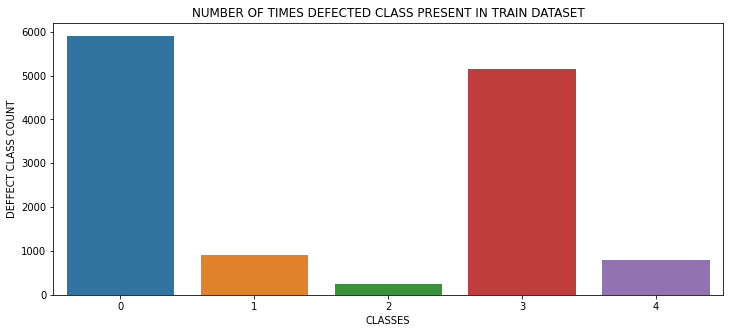

In [ ]:
Class_present_in_dataset(data)   

In [ ]:
# This graph denotes that how many images have single defects , double defects, Triple defects and all four defects.
# No_of_defect_type_in_image (data)   

<center><img src = "https://cdn.pixabay.com/photo/2019/06/13/09/41/business-4271251__340.png"
width="100" height="100"></center>

<font face="light green" color="006400"><b>1.Total number of defected images we have are 7095 and undefected images are 5902 i.e total we have 12568 images in total. </br>
Out of 12568 images, 12141 images has only single type of defect, 425 has double defects or no defect, only 2 have triple defects adn no image contain all four defects.</font>

<font face="light green" color="006400"><b>2
Number of times defects came in the train dataset.</br>
a) 3 : 5150</br>
b) 1 : 897</br>
c) 4 : 801</br>
d) 2 : 247</br>

We can see that most of the timed defect 3 is coming so we can conclude that defect 3 is the frequent type of defect that occur in the production of these steel parts, acc to train data given.
</font>




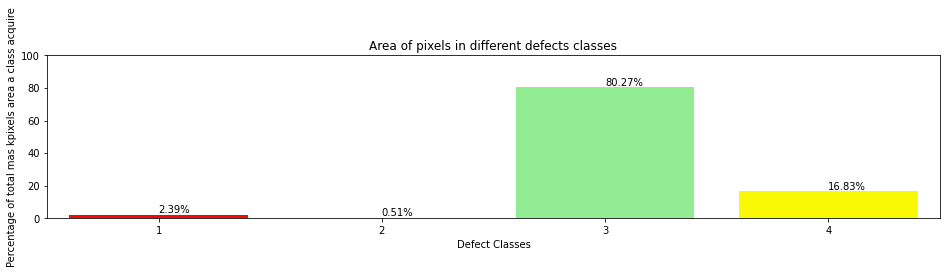

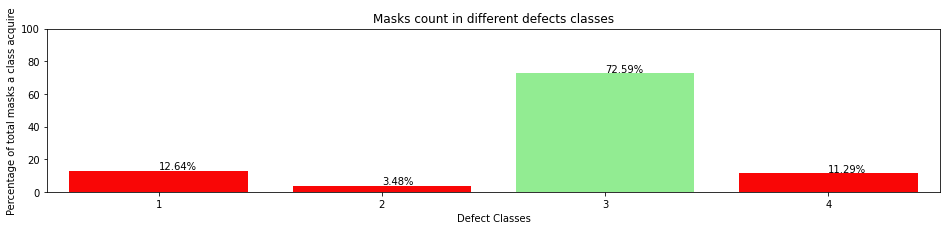

In [ ]:
# Calling utility function EDA_on_area
return_list = EDA_on_area(data) 
mask_count = return_list[0]
pixels_count = return_list[1]

total = sum(pixels_count)
pixels_count_perc = pixels_count/total*100
pixels_count_perc = np.round(pixels_count_perc,2)

total = sum(mask_count)
mask_count_perc = mask_count/total*100
mask_count_perc = np.round(mask_count_perc,2)

# Graph first.
plt.figure(figsize = (16,3))
plt.title("Area of pixels in different defects classes")
color_pallete = []
# This loop is to giv the color to the graph.
for i in pixels_count_perc:
  if i>50:
    color_pallete.append("lightgreen")
  elif i>15:
    color_pallete.append("yellow")
  else:
    color_pallete.append("red") 
count = 0 
# this loop is for annotation in the grpah.
for i in pixels_count_perc:
  plt.annotate(str(i) + "%" , (count,i+1))
  count+=1
# creating the bar graph
sns.barplot([1,2,3,4],pixels_count_perc,palette =color_pallete,saturation = .95 )
plt.xlabel("Defect Classes")
plt.ylabel("Percentage of total mas kpixels area a class acquire")
plt.yticks([0,20,40,60,80,100])
# plt.ylabel("Defected area of the image")   
plt.show() 

# Graph Second.
plt.figure(figsize = (16,3))
plt.title("Masks count in different defects classes")
color_pallete = []
for i in mask_count_perc:
  if i>50:
    color_pallete.append("lightgreen")
  elif i>15:
    color_pallete.append("yellow")
  else:
    color_pallete.append("red") 
count = 0 
for i in mask_count_perc:
  plt.annotate(str(i) + "%" , (count,i+1))
  count+=1
sns.barplot([1,2,3,4],mask_count_perc,palette =color_pallete,saturation = .95 )
plt.xlabel("Defect Classes")
plt.ylabel("Percentage of total masks a class acquire")
plt.yticks([0,20,40,60,80,100])
# plt.ylabel("Defected area of the image")   
plt.show() 

<center><img src = "https://cdn.pixabay.com/photo/2019/06/13/09/41/business-4271251__340.png"
width="100" height="100"></center>

<font face="light green" color="006400"><b>3. We can see from the above images that defect 3 is having the maximun area out of the total defect area.</br>
for eg : out of total 100 defected area 80.27 corresponds to defect 3 adn remaining to the others.</font>

<font face="light green" color="006400"><b>4. 2nd image shows the same thing as we have in 2nd point of the EDA summary above but in percentage so skipping this.</font>





In [ ]:
print("Class 1...")
print(data[data["ClassId"]==1]["mask_pixel_sum"].describe())
print("Class 2...")
print(data[data["ClassId"]==2]["mask_pixel_sum"].describe())
print("Class 3...")
print(data[data["ClassId"]==3]["mask_pixel_sum"].describe())
print("Class 4...")
print(data[data["ClassId"]==4]["mask_pixel_sum"].describe())

Class 1...
count      897.000000
mean      4361.347826
std       3591.053407
min        163.000000
25%       1762.000000
50%       3326.000000
75%       5795.000000
max      31303.000000
Name: mask_pixel_sum, dtype: float64
Class 2...
count      247.000000
mean      3378.425101
std       2049.382114
min        316.000000
25%       1947.500000
50%       2944.000000
75%       4337.500000
max      14023.000000
Name: mask_pixel_sum, dtype: float64
Class 3...
count      5150.000000
mean      25496.485243
std       37945.334103
min         115.000000
25%        5054.250000
50%       11953.500000
75%       29029.500000
max      368240.000000
Name: mask_pixel_sum, dtype: float64
Class 4...
count       801.000000
mean      34373.997503
std       29590.265099
min         491.000000
25%       13114.000000
50%       25357.000000
75%       45221.000000
max      192780.000000
Name: mask_pixel_sum, dtype: float64


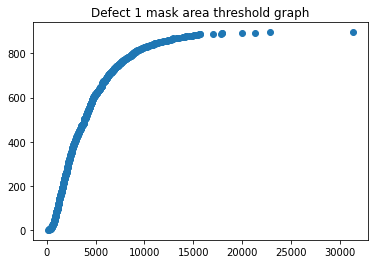

In [ ]:
a = [i for i in data[data["ClassId"]==1]["mask_pixel_sum"].values]
a = sorted(a)
plt.title("Defect 1 mask area threshold graph")
plt.scatter(a,range(len(a)))

In [ ]:
a[-10:-1] # i will keep  16000 as threshold

[15666.0,
 15689.0,
 17050.0,
 17868.0,
 17946.0,
 17983.0,
 19997.0,
 21319.0,
 22844.0]

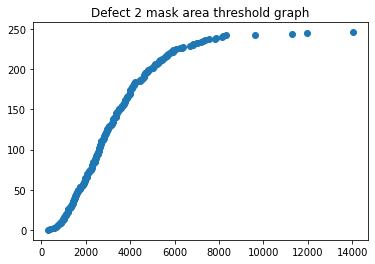

In [ ]:
a = [i for i in data[data["ClassId"]==2]["mask_pixel_sum"].values]
a = sorted(a)
plt.title("Defect 2 mask area threshold graph")
plt.scatter(a,range(len(a)))

In [ ]:
a[-10:] # i will keep  8500 as threshold

[7552.0,
 7812.0,
 7885.0,
 8152.0,
 8163.0,
 8309.0,
 9641.0,
 11302.0,
 11973.0,
 14023.0]

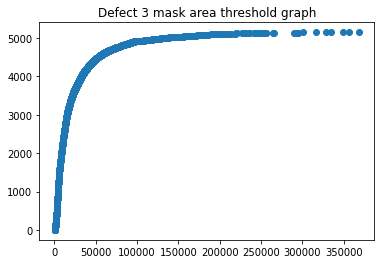

In [ ]:
a = [i for i in data[data["ClassId"]==3]["mask_pixel_sum"].values]
a = sorted(a)
plt.title("Defect 3 mask area threshold graph")
plt.scatter(a,range(len(a)))

In [ ]:
a[-20:] # i will keep  270000 as threshold

[243639.0,
 247303.0,
 249859.0,
 251264.0,
 252123.0,
 255797.0,
 256073.0,
 264498.0,
 265513.0,
 289556.0,
 293849.0,
 293992.0,
 294668.0,
 301191.0,
 316414.0,
 328743.0,
 334142.0,
 349106.0,
 356308.0,
 368240.0]

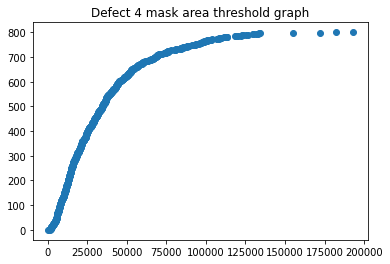

In [ ]:
a = [i for i in data[data["ClassId"]==4]["mask_pixel_sum"].values]
a = sorted(a)
plt.title("Defect 4 mask area threshold graph")
plt.scatter(a,range(len(a)))

In [ ]:
a[-10:] # i will keep  140000 as threshold

[129794.0,
 129924.0,
 131875.0,
 133065.0,
 133656.0,
 134071.0,
 154818.0,
 171949.0,
 182380.0,
 192780.0]

<center><img src = "https://cdn.pixabay.com/photo/2019/06/13/09/41/business-4271251__340.png"
width="100" height="100"></center>

<font face="light green" color="006400"><b>5. Above graphs shows us the defect area per class in sorted order. We can conclude from the above images that defect 3 has big patches of the defect as we have high area of pixels which is defected</font>


<font face="light green" color="006400"><b>6. Lets see the defect path size order  : Defect 3 > Defect 4 > Defect 1 > Defect 2
</font>

<font face="light green" color="006400"><b>7. Images we have been givne is in the shape (256,1600)
</font>



# **3. Image Visualization**

                                             Defect Type 0
Image id :  c9c186f0b.jpg
Image id :  c521c444d.jpg
Image id :  c62b766cc.jpg
Image id :  2be7b0fb4.jpg


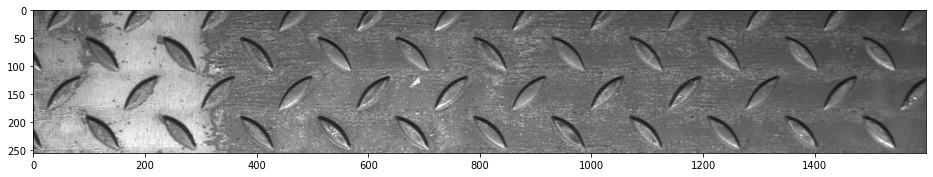

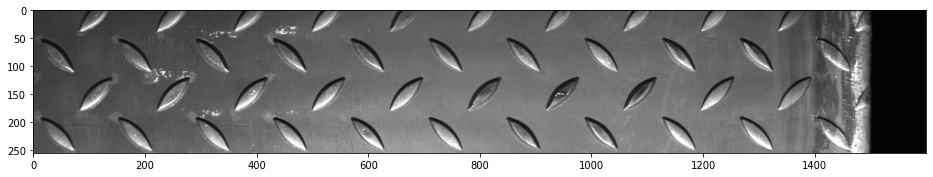

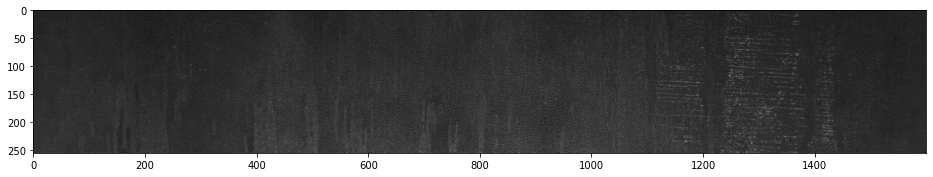

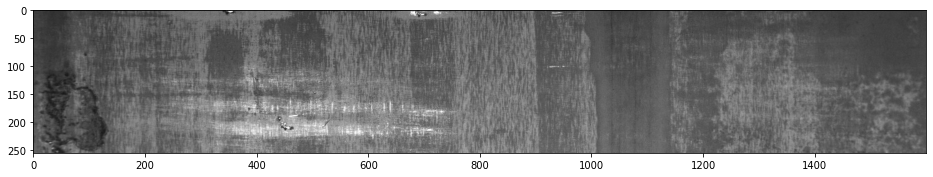

In [ ]:
Defect_images(data,0,39,43) 

                                             Defect Type 1
Image id :  86cbb2d1f.jpg
Image id :  268f0fa63.jpg
Image id :  eb2b76683.jpg
Image id :  16aabaf79.jpg


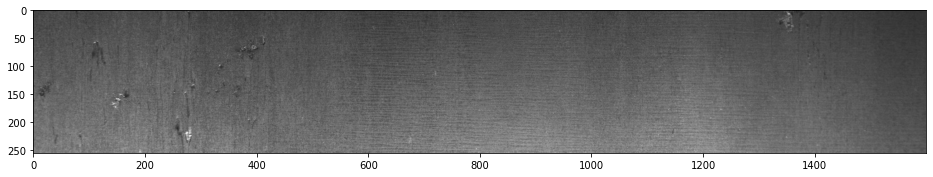

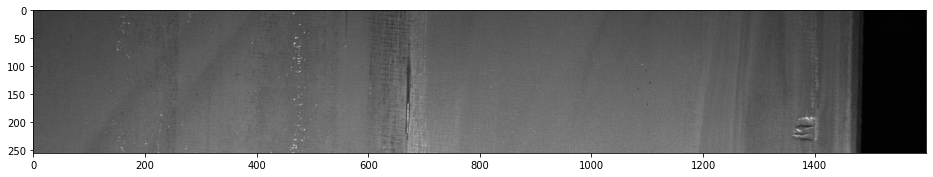

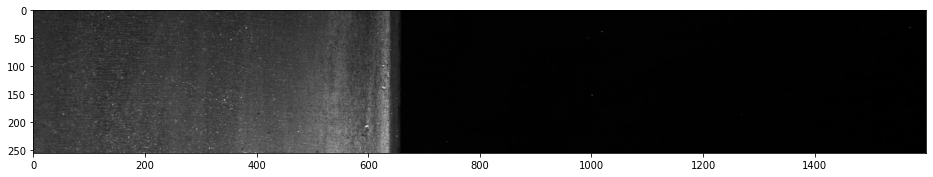

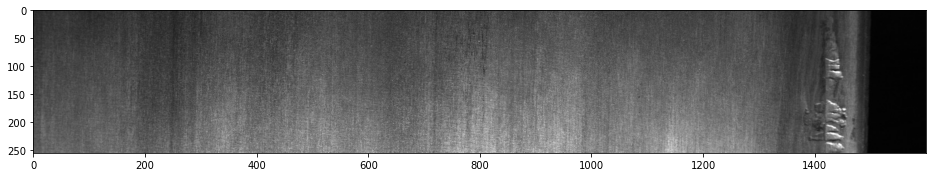

In [ ]:
Defect_images(data,1,39,43) 

                                             Defect Type 2
Image id :  1c1ca0221.jpg
Image id :  933675d91.jpg
Image id :  c35fa49e2.jpg
Image id :  68cc04a14.jpg


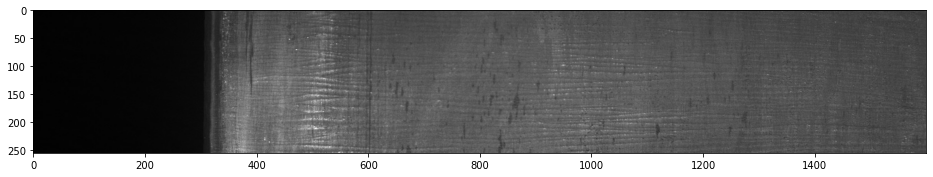

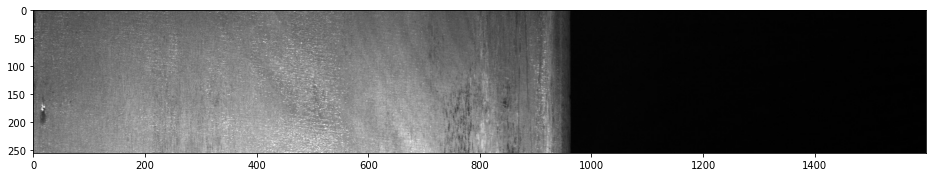

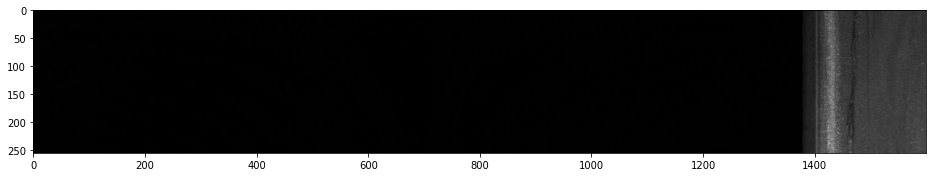

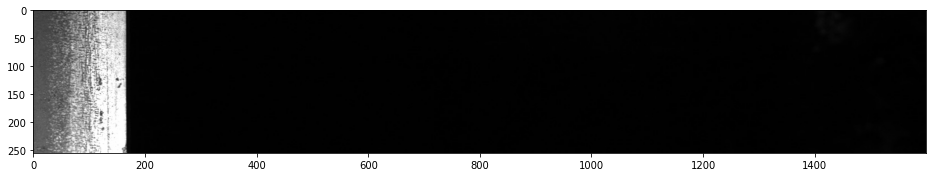

In [ ]:
Defect_images(data,2,39,43) 

                                             Defect Type 3
Image id :  e03dd6e96.jpg
Image id :  470a96423.jpg
Image id :  e12136afc.jpg
Image id :  7a2096ee2.jpg


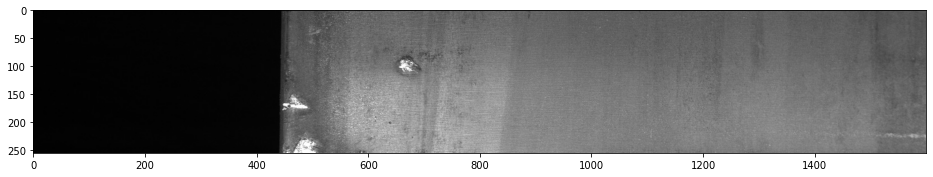

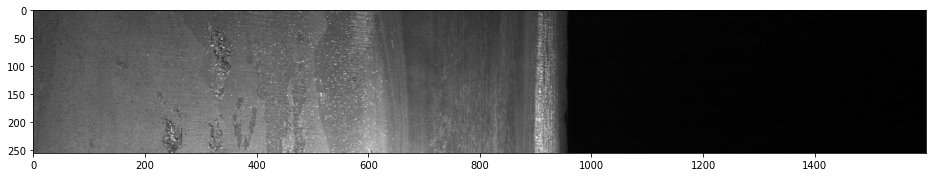

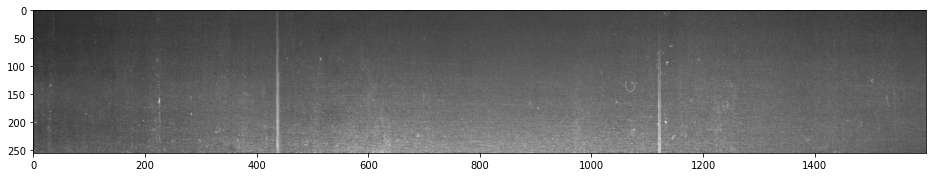

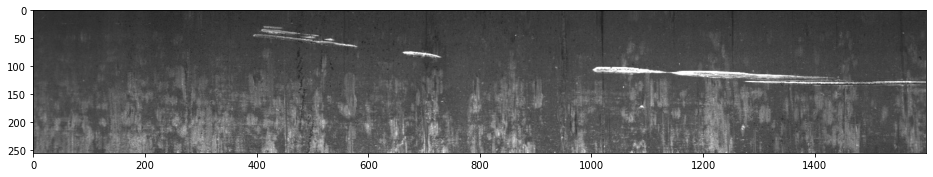

In [ ]:
Defect_images(data,3,39,43)       

                                             Defect Type 4
Image id :  280dbbace.jpg
Image id :  7242fe32c.jpg
Image id :  c646462b5.jpg
Image id :  bfd38637f.jpg


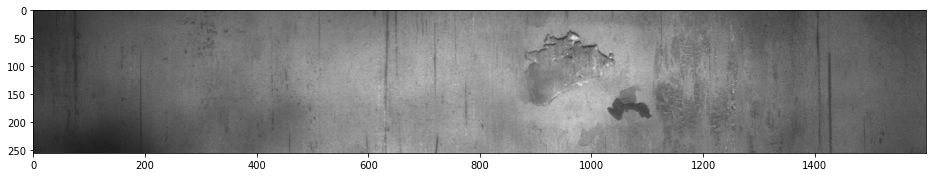

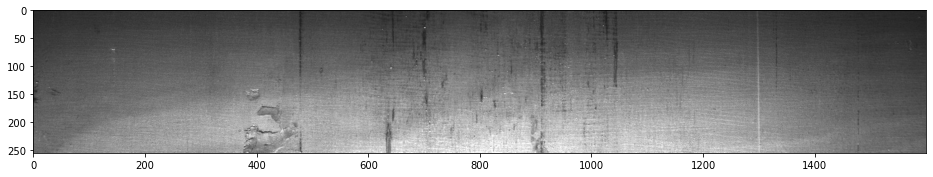

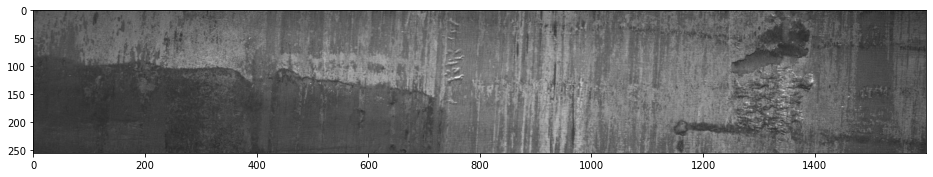

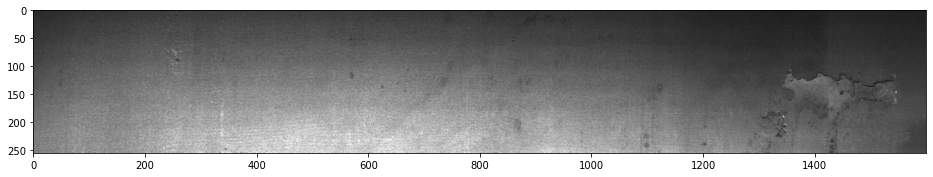

In [ ]:
Defect_images(data,4,39,43)        

<center><img src = "https://cdn.pixabay.com/photo/2019/06/13/09/41/business-4271251__340.png"
width="100" height="100"></center>

<font face="light green" color="006400"><b>8. From the Visualization above we can see exactly the same thing that we have analyzed from the data that image 3 has large patches of defects then defect 4, then defect 1 then defect 2.</font>


<font face="light green" color="006400"><b>9. with no defect images we can als o see some patches but may be those are not the defect as these defects are masked by experts and acc to the business requirement.</font>


# **4. Let's see one mask for defect 4**

Masked Image for defect 4
AxesImage(144,36;892.8x217.44)


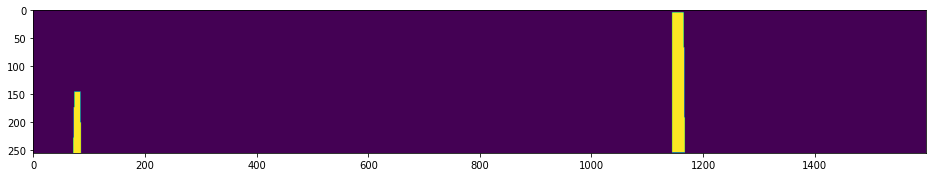

In [ ]:
Encoded = data[data["ImageId"]=="0007a71bf.jpg"]["EncodedPixels"].values[0]
print("Masked Image for defect 4")
Masked_image = rle2mask(Encoded)
plt.figure(figsize=(16,4))
print(plt.imshow(Masked_image))

In [ ]:
def mask2rle(img):
    '''
    img: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    '''
    pixels= img.T.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)
mask2rle(np.resize(Masked_image,(256,1600)))

'18661 28 18863 82 19091 110 19347 110 19603 110 19859 110 20115 110 20371 110 20627 110 20883 110 21139 110 21395 110 21651 110 21962 55 293125 251 293381 251 293637 251 293893 251 294149 251 294405 251 294661 251 294917 251 295173 251 295429 251 295685 251 295941 251 296197 251 296453 251 296709 251 296965 251 297221 251 297477 251 297733 251 297989 251 298245 251 298564 188 298945 63'

In [ ]:
Masked_image.shape

(256, 1600)

In [ ]:
Encoded

'18661 28 18863 82 19091 110 19347 110 19603 110 19859 110 20115 110 20371 110 20627 110 20883 110 21139 110 21395 110 21651 110 21962 55 293125 251 293381 251 293637 251 293893 251 294149 251 294405 251 294661 251 294917 251 295173 251 295429 251 295685 251 295941 251 296197 251 296453 251 296709 251 296965 251 297221 251 297477 251 297733 251 297989 251 298245 251 298564 188 298945 63'